In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.pandas.set_option("display.max_columns", None)



In [2]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
df_train.corr().style.background_gradient(cmap="coolwarm")

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

<AxesSubplot:>

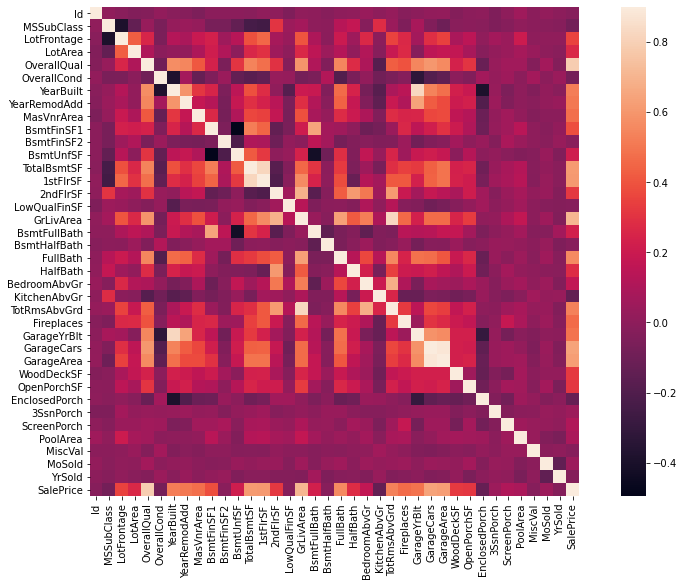

In [7]:
heatmap=df_train.corr()
f, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(heatmap, vmax=.9, square=True)

We can have a quick visualiation of the highly correlated features.
Sales Price has 70%correlation with OverallQual,GrLivArea.
60%+ for GarageCars,GarageArea, TotalBsmtSF and 1st floor SF.


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

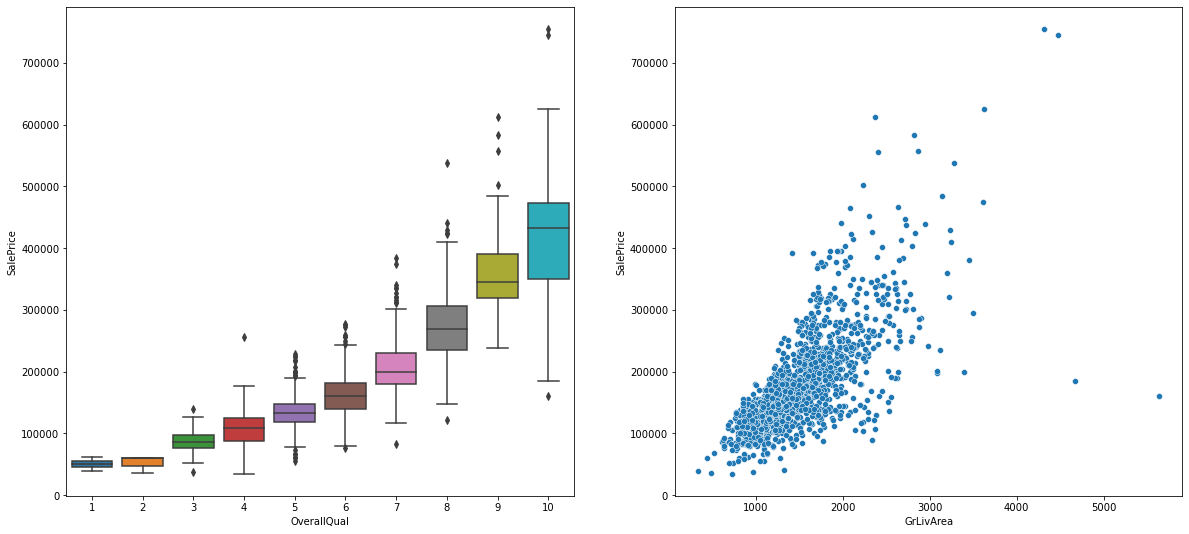

In [8]:
fig, ax=plt.subplots(1,2, figsize=(20,9))
sns.boxplot(data=df_train, x=df_train['OverallQual'], y=df_train['SalePrice'], ax=ax[0])
sns.scatterplot(data=df_train, x=df_train['GrLivArea'], y=df_train['SalePrice'], ax=ax[1])

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

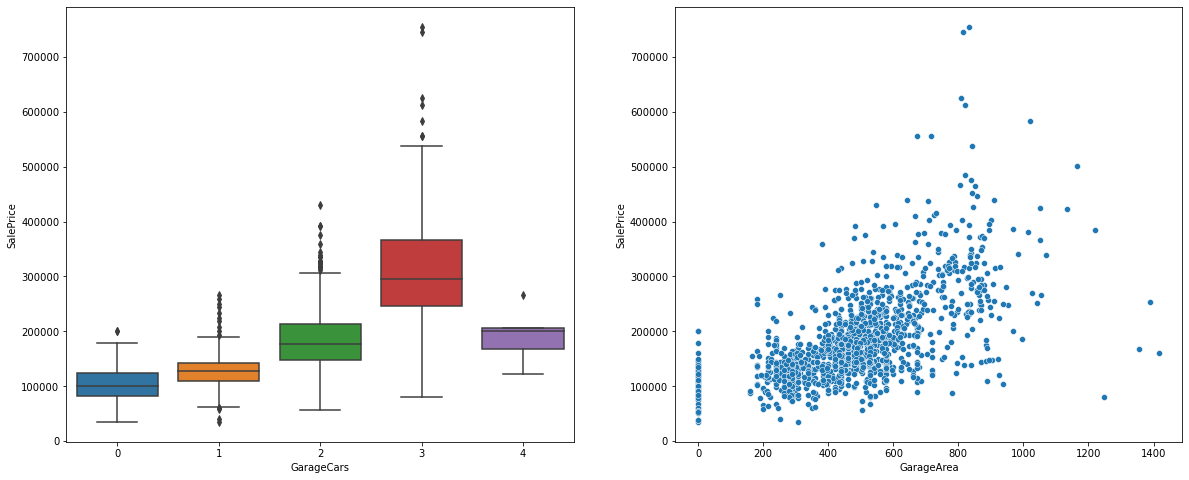

In [9]:
fig, ax=plt.subplots(1,2, figsize=(20,8))
sns.boxplot(data=df_train, x=df_train['GarageCars'], y=df_train['SalePrice'], ax=ax[0])
sns.scatterplot(data=df_train, x=df_train['GarageArea'], y=df_train['SalePrice'], ax=ax[1])

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

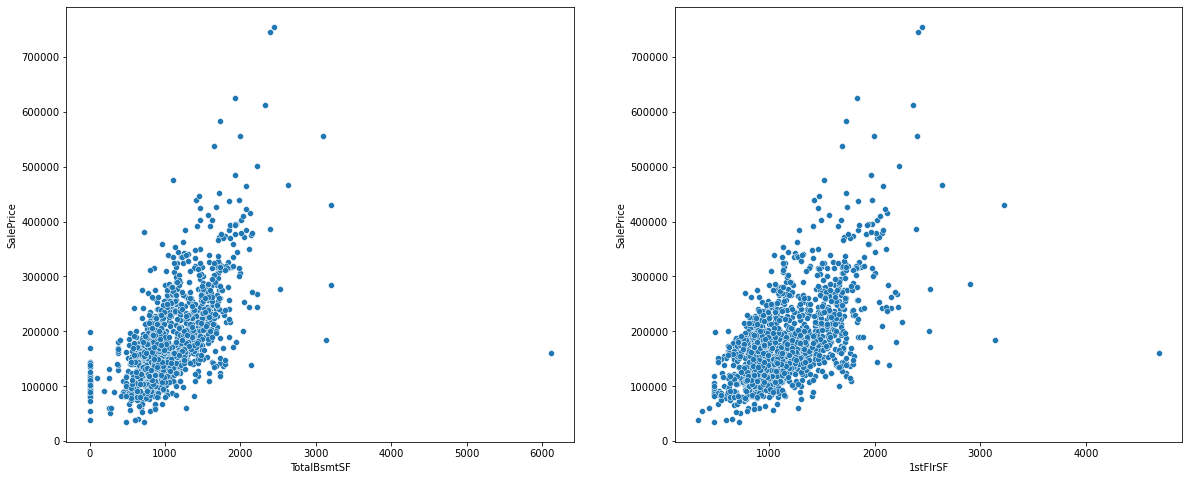

In [10]:
fig, ax=plt.subplots(1,2, figsize=(20,8))
sns.scatterplot(data=df_train, x=df_train['TotalBsmtSF'], y=df_train['SalePrice'],ax=ax[0])
sns.scatterplot(data=df_train, x=df_train['1stFlrSF'], y=df_train['SalePrice'], ax=ax[1])


Looking at these graphs, there are multiple outliers present. This will be further examined, along with their skewness later on.

# Missing Features

First we need to create a data frame that has both training and test data
so we can treat missing values.
Combining the data set is not an issue as long as we do not apply any prepocessing to the data.

In [11]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]

entire_df=pd.concat((df_train,df_test)).reset_index(drop=True)


In [12]:
nindex, nfeatures = entire_df.shape

In [13]:
null_features=[feature for feature in entire_df.columns if entire_df[feature].isnull().any()]
total=entire_df[null_features].isnull().sum().sort_values(ascending=False)
percent=(entire_df[null_features].isnull().sum()/entire_df[null_features].isnull().count()).sort_values(ascending=False)

missing_values=pd.concat([total,percent], axis=1, keys=['Total', 'Percent'])
missing_values

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471
GarageQual,159,0.054471


Text(0.5, 1.0, 'Missing values per feature')

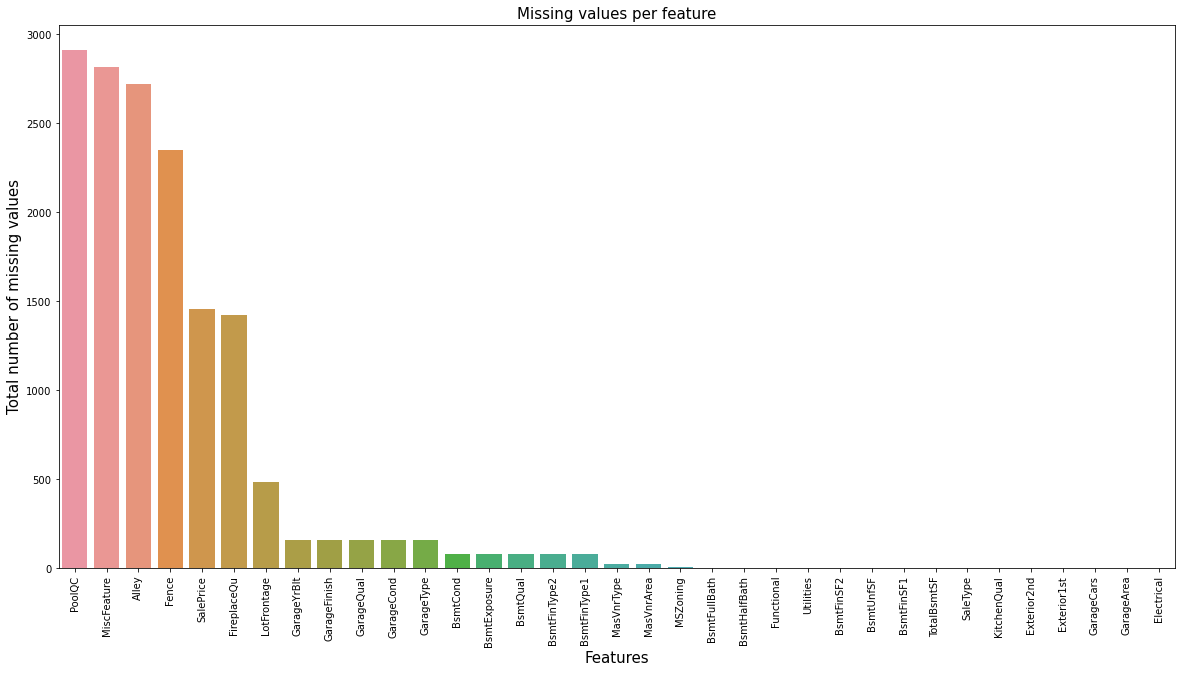

In [14]:
f, ax =plt.subplots(figsize=(20,10))
plt.xticks(rotation='90')
sns.barplot(x=total.index, y=total,)
ax.set_xlabel('Features', fontsize=15)
ax.set_ylabel('Total number of missing values', fontsize=15)
ax.set_title('Missing values per feature', fontsize=15)


### Replacing nan individual features with 'None'

In [15]:
for feature in ["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"]:
    print(df_train[feature].unique(), feature)

[nan 'Ex' 'Fa' 'Gd'] PoolQC
[nan 'Shed' 'Gar2' 'Othr' 'TenC'] MiscFeature
[nan 'Grvl' 'Pave'] Alley
[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw'] Fence
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po'] FireplaceQu


Looking at further information Kaggle provides, you can determine these nan values mean they do not have said feature, not that said feature is missing from the dataset.
This means we can replace them with 'None'.

In [16]:
replacing_null_features=["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"]

for feature in replacing_null_features:
    entire_df[feature]=entire_df[feature].fillna("None")

In [17]:
entire_df[replacing_null_features].isnull().sum()

PoolQC         0
MiscFeature    0
Alley          0
Fence          0
FireplaceQu    0
dtype: int64

In [18]:
entire_df['LotFrontage'].fillna(value=entire_df['LotFrontage'].median(), inplace=True)
entire_df['MasVnrArea'].fillna(value=entire_df['MasVnrArea'].median(),inplace=True)

### Missing Garage Features

In [19]:
missing_garage_features=[feature for feature in entire_df.columns if "Garage" in feature and entire_df[feature].isnull().any()]

In [20]:
missing_garage_features

['GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond']

Similar to the previous null values, the null values for the garage features would mean the house does not have a garage.

In [21]:
for feature in ['GarageQual','GarageFinish','GarageCond','GarageType']:
    entire_df[feature].fillna(value='None', inplace=True)
    
for feature in ['GarageCars','GarageYrBlt','GarageArea']:
    entire_df[feature].fillna(value=0, inplace=True)

In [22]:
entire_df[missing_garage_features].isnull().sum()

GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageCars      0
GarageArea      0
GarageQual      0
GarageCond      0
dtype: int64

### Missing Basement Features

In [23]:
bsmt_null_features=[feature for feature in entire_df.columns if "Bsmt" in feature and entire_df[feature].isnull().any()]

In [24]:
bsmt_null_features

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath']

The null vales for the basement could also mean the respective house does not have a basement. We can look into this by producing a dataframe of only basement features and seeing if null values of basement features are consistent with each other.

In [25]:
basement_features=[feature for feature in entire_df.columns if "Bsmt" in feature]
bs_df=entire_df[basement_features]
bs_df[bs_df["BsmtQual"].isnull()].head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
17,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
39,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
90,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
102,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
156,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


The Basement dataframe further gives strong evidence of this being the case. Therefore, we can replace the null values with 'None' and 0, respectively.

In [26]:
for feature in ['BsmtQual', 'BsmtExposure', 'BsmtFinType1','BsmtCond', 'BsmtFinType2' ]:
    entire_df[feature].fillna(value='None', inplace=True)
    
for feature in ['TotalBsmtSF', 'BsmtHalfBath','BsmtFinSF1', 'BsmtFinSF2','BsmtFullBath', 'BsmtUnfSF']:
    entire_df[feature].fillna(value=0, inplace=True)

In [27]:
entire_df[bsmt_null_features].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

The rest of the features are genuine null values, therfore we can fill them in using standard techniques. 
We can fill in missing values by using mean, mode or taking into account other variables.
For example, the LotFrontage for a house may be proportional to its neighbourhood and the same can be said for electricity.

In [28]:
for feature in ['Electrical','MSZoning',]:
    entire_df[feature] = entire_df.groupby('Neighborhood')[feature]\
                        .transform(lambda x: x.fillna(x.mode()[0]))
    
entire_df['LotFrontage'] = entire_df.groupby('Neighborhood')['LotFrontage']\
                          .transform(lambda x: x.fillna(x.mean()))

In [29]:
entire_df['KitchenQual'].fillna('TA',inplace=True)


In [30]:
for feature in ['MasVnrType','Exterior1st','Exterior2nd','Functional','SaleType']:
    entire_df[feature].fillna(entire_df[feature].mode, inplace=True)

In [31]:
entire_df['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

No variability for Utilities, will not help for the ML model and therefore can be dropped.

In [32]:
entire_df.drop(columns=['Utilities'], inplace=True)

## Seperating features into Numerical and Categorical

In [33]:
numerical_features=[feature for feature in entire_df.columns if entire_df[feature].dtype!='O']
entire_df[numerical_features].head(3)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500.0


In [34]:
categorical_features=[feature for feature in entire_df.columns if entire_df[feature].dtype=='O']
entire_df[categorical_features].head(3)

,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


From the categorical features, we can see there are a number of ordinal features that need to be represented with a range of numbers to accurately represent their importance. Therefore, we can further seperate categorical features into ordinal and nominal features.

In [35]:
ordinal_features=['LotShape','ExterQual','ExterCond','BsmtQual','BsmtCond',
'BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual',
'FireplaceQu','GarageQual','GarageCond','GarageFinish','Fence','PoolQC']

In [36]:
entire_df[ordinal_features].head(3)

,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,GarageFinish,Fence,PoolQC
0,Reg,Gd,TA,Gd,TA,No,GLQ,Unf,Ex,Gd,None,TA,TA,RFn,None,None
1,Reg,TA,TA,Gd,TA,Gd,ALQ,Unf,Ex,TA,TA,TA,TA,RFn,None,None
2,IR1,Gd,TA,Gd,TA,Mn,GLQ,Unf,Ex,Gd,TA,TA,TA,RFn,None,None


In [37]:
#Producing a nested list that will be used for encoding the ordinal features
for feature in ordinal_features:
    print(entire_df[feature].unique(), feature)

['Reg' 'IR1' 'IR2' 'IR3'] LotShape
['Gd' 'TA' 'Ex' 'Fa'] ExterQual
['TA' 'Gd' 'Fa' 'Po' 'Ex'] ExterCond
['Gd' 'TA' 'Ex' 'None' 'Fa'] BsmtQual
['TA' 'Gd' 'None' 'Fa' 'Po'] BsmtCond
['No' 'Gd' 'Mn' 'Av' 'None'] BsmtExposure
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'None' 'LwQ'] BsmtFinType1
['Unf' 'BLQ' 'None' 'ALQ' 'Rec' 'LwQ' 'GLQ'] BsmtFinType2
['Ex' 'Gd' 'TA' 'Fa' 'Po'] HeatingQC
['Gd' 'TA' 'Ex' 'Fa'] KitchenQual
['None' 'TA' 'Gd' 'Fa' 'Ex' 'Po'] FireplaceQu
['TA' 'Fa' 'Gd' 'None' 'Ex' 'Po'] GarageQual
['TA' 'Fa' 'None' 'Gd' 'Po' 'Ex'] GarageCond
['RFn' 'Unf' 'Fin' 'None'] GarageFinish
['None' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw'] Fence
['None' 'Ex' 'Fa' 'Gd'] PoolQC


In [38]:
ordinal_orders=[ 
    #LotShape 
['Reg','IR1' ,'IR2','IR3'], 
    #ExterQual 
['Fa','TA','Gd','Ex'], 
    #ExterCond
['Po','Fa','TA','Gd','Ex'],
    #BsmtQual 
['None','Fa','TA','Gd','Ex'], 
    #BsmtCond 
['None','Po','Fa','TA','Gd','Ex'], 
    #BsmtExposure 
['None','No','Mn','Av','Gd'], 
    #BsmtFinType1 
['None','Unf','LwQ', 'Rec','BLQ','ALQ' , 'GLQ' ],
    #BsmtFinType2 
['None','Unf','LwQ', 'Rec','BLQ','ALQ' , 'GLQ' ], 
    #HeatingQC 
['Po','Fa','TA','Gd','Ex'], 
    #KitchenQual 
['Fa','TA','Gd','Ex'],
    #FireplaceQu 
['None','Po','Fa','TA','Gd','Ex'], 
    #GarageQual 
['None','Po','Fa','TA','Gd','Ex'], 
    #GarageCond 
['None','Po','Fa','TA','Gd','Ex'], 
    #GarageFinish 
['None','Unf','RFn','Fin'], 
    #Fence 
['None','MnWw','GdWo','MnPrv','GdPrv'], 
    #PoolQC
['None','Fa','Gd','Ex']
]
    


In [39]:
nominal_features=[feature for feature in entire_df.columns if feature not in numerical_features and feature not in ordinal_features]


In [40]:
entire_df[nominal_features].head(3)

,MSZoning,Street,Alley,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,Functional,GarageType,PavedDrive,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Typ,Attchd,Y,None,WD,Normal
1,RL,Pave,None,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,Y,SBrkr,Typ,Attchd,Y,None,WD,Normal
2,RL,Pave,None,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Typ,Attchd,Y,None,WD,Normal


## Removing Outliers and Reducing Skewness for numercial features

### Functions for Numerical plots and outliers

In [41]:
from scipy.stats import norm
def numerical_dist(feature):
    sns.set_style('whitegrid')

    fig, (ax1,ax2,)=plt.subplots(1,2, figsize=(20,5))
    sns.distplot(entire_df[feature],fit=norm, fit_kws={"color":"red"}, ax=ax1)
    stats.probplot(entire_df[feature], plot=ax2)

def numerical_outliers(feature):
    fig, (ax1,ax2)=plt.subplots(1,2, figsize=(20,5))
    sns.scatterplot(entire_df[feature], entire_df['SalePrice'], ax=ax1,)
    sns.boxplot(entire_df[feature], orient='v', ax=ax2)
    

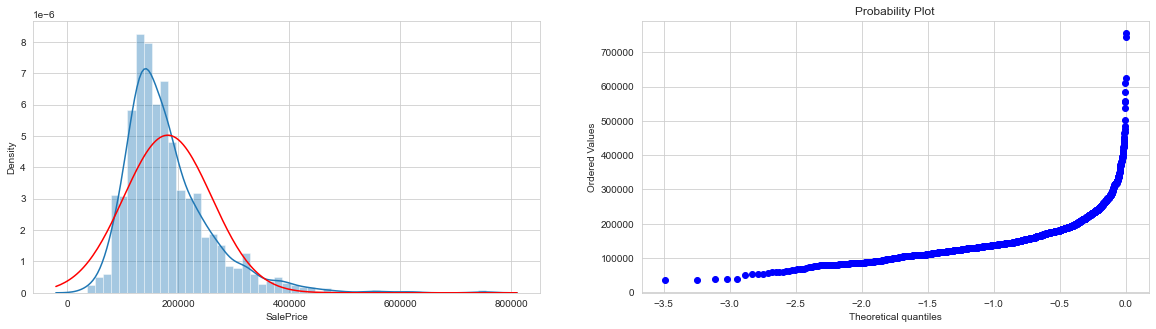

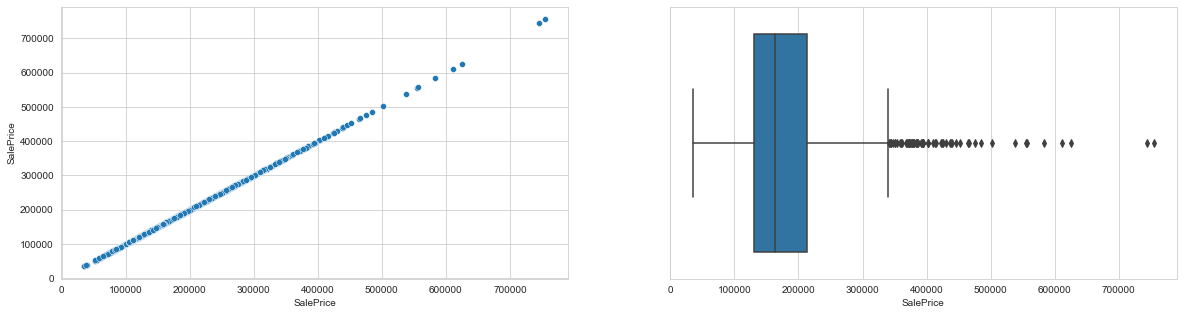

In [42]:
numerical_dist('SalePrice')
numerical_outliers('SalePrice')

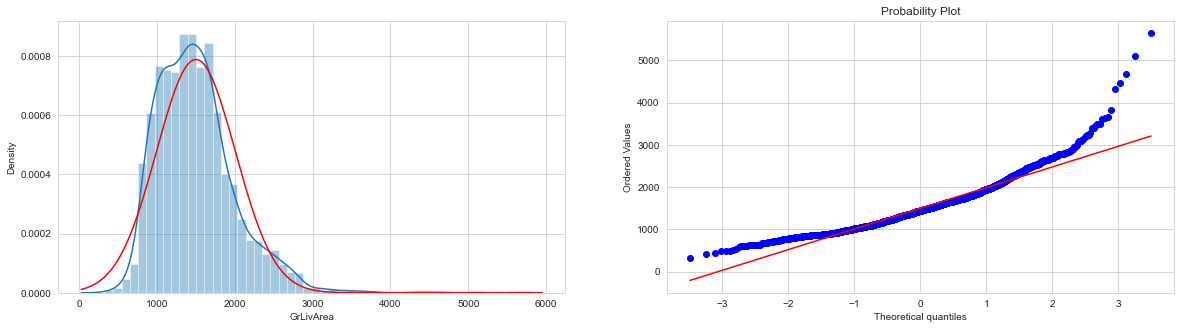

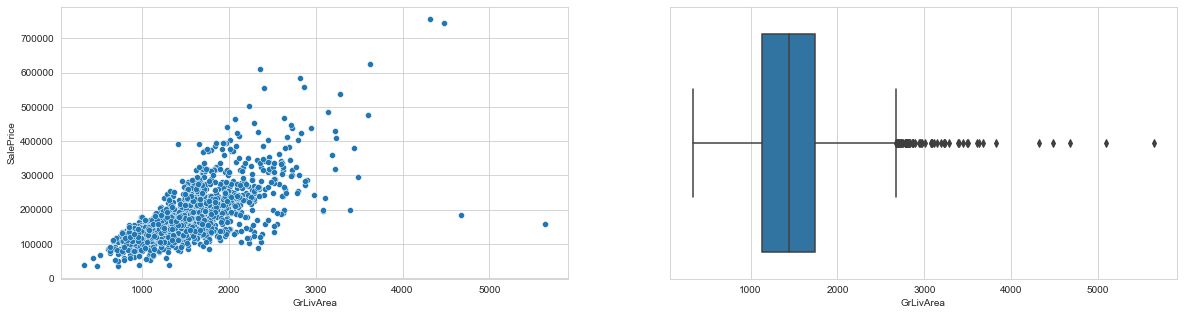

In [43]:
numerical_dist('GrLivArea')
numerical_outliers('GrLivArea')

In [45]:
drop_index = np.append(drop_index, entire_df['GrLivArea'][
    (entire_df['GrLivArea'] > 4000) & (entire_df['SalePrice'] < 12.5)
].index)


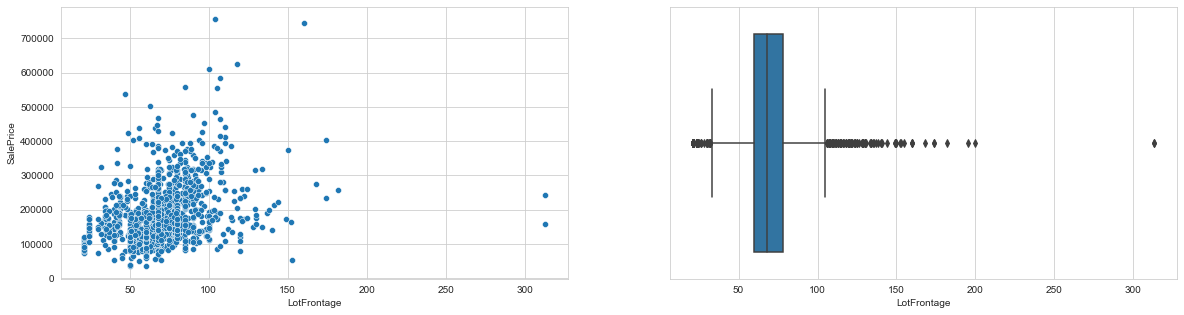

In [47]:
numerical_outliers('LotFrontage')

In [48]:
drop_index = entire_df['LotFrontage'][entire_df['LotFrontage'] > 300].index

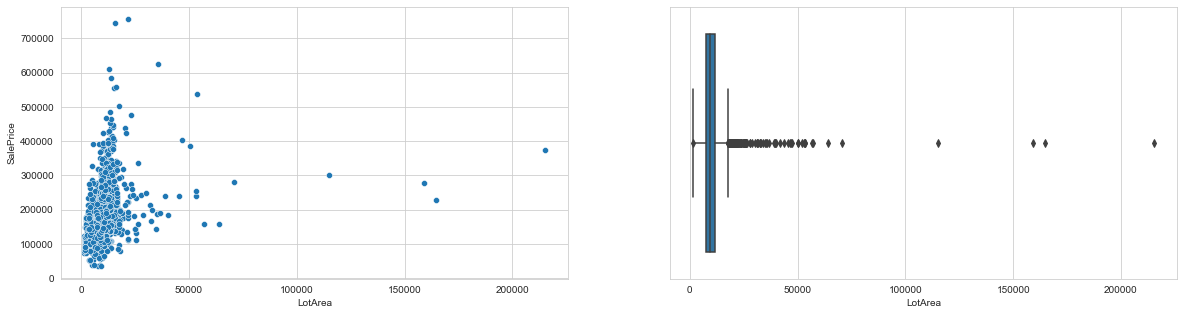

In [49]:
numerical_outliers('LotArea')

In [50]:
drop_index = np.append(drop_index, entire_df['LotArea'][entire_df['LotArea'] > 100000].index)


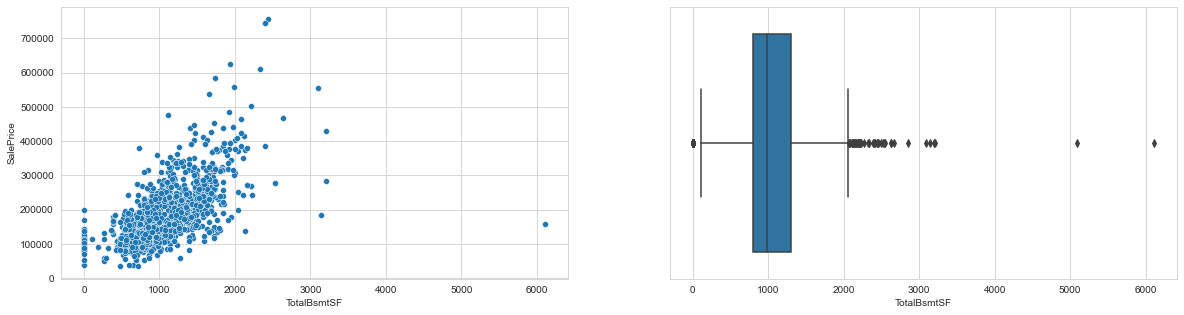

In [51]:
numerical_outliers('TotalBsmtSF')

In [52]:
drop_index = np.append(drop_index, entire_df['TotalBsmtSF'][entire_df['TotalBsmtSF'] > 6000].index)

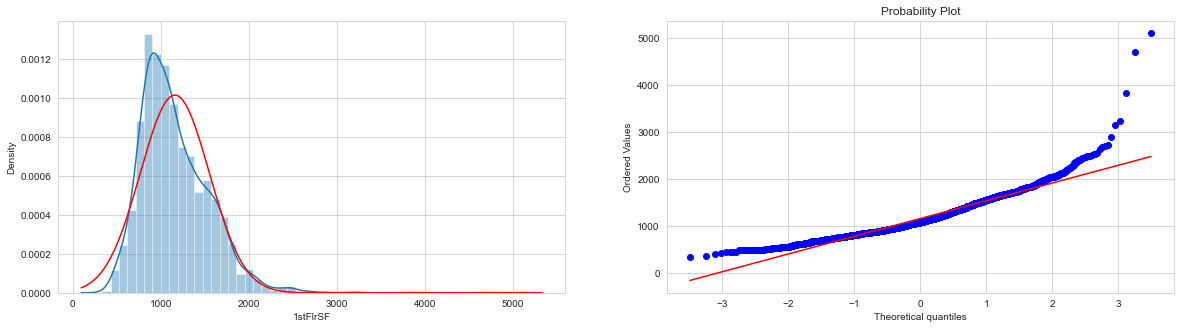

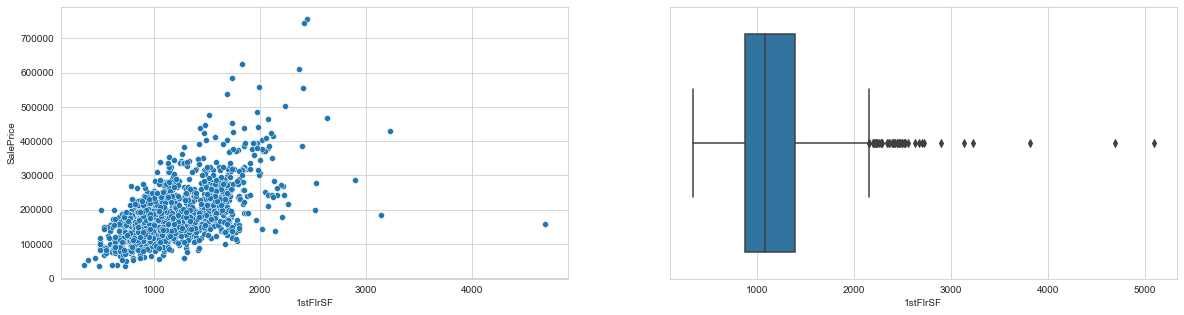

In [53]:
numerical_dist('1stFlrSF')
numerical_outliers('1stFlrSF')

In [54]:
drop_index = np.append(drop_index, entire_df['1stFlrSF'][entire_df['1stFlrSF'] > 4000].index)


### Reducing Skewness

In [56]:
from scipy.stats import skew

In [57]:
skew_features=entire_df[numerical_features].apply(lambda x: x.skew())
high_skew=skew_features[skew_features>0.5]

In [58]:
skew_features

Id                0.000000
MSSubClass        1.376165
LotFrontage       1.675713
LotArea          12.829025
OverallQual       0.197212
OverallCond       0.570605
YearBuilt        -0.600114
YearRemodAdd     -0.451252
MasVnrArea        2.614936
BsmtFinSF1        1.425963
BsmtFinSF2        4.148275
BsmtUnfSF         0.919812
TotalBsmtSF       1.157489
1stFlrSF          1.470360
2ndFlrSF          0.862118
LowQualFinSF     12.094977
GrLivArea         1.270010
BsmtFullBath      0.625153
BsmtHalfBath      3.933616
FullBath          0.167692
HalfBath          0.694924
BedroomAbvGr      0.326492
KitchenAbvGr      4.304467
TotRmsAbvGrd      0.758757
Fireplaces        0.733872
GarageYrBlt      -3.908213
GarageCars       -0.219694
GarageArea        0.239380
WoodDeckSF        1.843380
OpenPorchSF       2.536417
EnclosedPorch     4.005950
3SsnPorch        11.381914
ScreenPorch       3.948723
PoolArea         16.907017
MiscVal          21.958480
MoSold            0.195985
YrSold            0.132467
S

In [59]:
high_skew

MSSubClass        1.376165
LotFrontage       1.675713
LotArea          12.829025
OverallCond       0.570605
MasVnrArea        2.614936
BsmtFinSF1        1.425963
BsmtFinSF2        4.148275
BsmtUnfSF         0.919812
TotalBsmtSF       1.157489
1stFlrSF          1.470360
2ndFlrSF          0.862118
LowQualFinSF     12.094977
GrLivArea         1.270010
BsmtFullBath      0.625153
BsmtHalfBath      3.933616
HalfBath          0.694924
KitchenAbvGr      4.304467
TotRmsAbvGrd      0.758757
Fireplaces        0.733872
WoodDeckSF        1.843380
OpenPorchSF       2.536417
EnclosedPorch     4.005950
3SsnPorch        11.381914
ScreenPorch       3.948723
PoolArea         16.907017
MiscVal          21.958480
SalePrice         1.882876
dtype: float64

In [60]:
high_skew_features=high_skew.index
for feature in high_skew_features:
    entire_df[feature]=np.log1p(entire_df[feature])

It would be better if we can combine very similar features and remove any useless features, in order to help the model train better.


In [62]:
entire_df["Age of house"]=entire_df['YrSold']-entire_df['YearBuilt']
entire_df.drop(['YrSold','YearBuilt', 'MoSold','YearRemodAdd'], axis=1, inplace=True)

entire_df["TotalSF"] = entire_df["1stFlrSF"] + entire_df["2ndFlrSF"]

entire_df['Entire House Quality'] =entire_df['OverallQual'] + entire_df['OverallCond']

entire_df["AvgSqFtPerRoom"] = entire_df["GrLivArea"] / (entire_df["TotRmsAbvGrd"] + entire_df["KitchenAbvGr"] +entire_df["HalfBath"] + entire_df["FullBath"] )


In [63]:
numerical_features.remove('YrSold')
numerical_features.remove('YearRemodAdd')
numerical_features.remove('MoSold')
numerical_features.remove('YearBuilt')


## Preprocessing
Before we pre process the data, it's important we split the training and testing data so no indirect learning can be done.

In [64]:
df_train=entire_df[:-ntrain].drop(['SalePrice'], axis=1)
target=entire_df[:-ntrain]['SalePrice']
df_test=entire_df[-ntest:].drop(['SalePrice'], axis=1)

In [65]:
numerical_features.remove('SalePrice')

In [66]:
entire_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,Age of house,TotalSF,Entire House Quality,AvgSqFtPerRoom
0,1,4.110874,RL,4.189655,9.042040,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,1.791759,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.283204,Gd,TA,PConc,Gd,TA,No,GLQ,6.561031,Unf,0.0,5.017280,6.753438,GasA,Ex,Y,SBrkr,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,2,0.693147,3,0.693147,Gd,2.197225,Typ,0.000000,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.000000,4.127134,0.0,0.0,0.0,0.0,None,None,None,0.0,WD,Normal,12.247699,5,13.504539,8.791759,1.333359
1,2,3.044522,RL,4.394449,9.169623,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,2.197225,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,6.886532,Unf,0.0,5.652489,7.141245,GasA,Ex,Y,SBrkr,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,2,0.000000,3,0.693147,TA,1.945910,Typ,0.693147,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,5.700444,0.000000,0.0,0.0,0.0,0.0,None,None,None,0.0,WD,Normal,12.109016,31,7.141245,8.197225,1.539374
2,3,4.110874,RL,4.234107,9.328212,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,1.791759,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.093750,Gd,TA,PConc,Gd,TA,Mn,GLQ,6.188264,Unf,0.0,6.075346,6.825460,GasA,Ex,Y,SBrkr,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,2,0.693147,3,0.693147,Gd,1.945910,Typ,0.693147,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.000000,3.761200,0.0,0.0,0.0,0.0,None,None,None,0.0,WD,Normal,12.317171,7,13.590499,8.791759,1.404352


Making sure the categorical features have the right data type.

In [67]:
df_train[categorical_features]=df_train[categorical_features].astype(str)
df_test[categorical_features]=df_test[categorical_features].astype(str)

### Preprocessing Pipeline for Ordinal and Nominal Features

In [68]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [69]:
oe=OrdinalEncoder(categories=ordinal_orders, dtype=np.str_)
ohe=OneHotEncoder(sparse=False,handle_unknown='ignore')


In [70]:
categorical_transformer=ColumnTransformer([('OrdinalEncoder', oe, ordinal_features),
                                          ('OneHotEncoder',ohe,nominal_features)], remainder='passthrough')

In [71]:
categorical_pipeline=Pipeline([('Preprocessing',categorical_transformer)])

In [72]:
train=pd.DataFrame(categorical_pipeline.fit_transform(df_train))
test=pd.DataFrame(categorical_pipeline.transform(df_test))


In [73]:
ss=StandardScaler()


In [74]:
train=pd.DataFrame(ss.fit_transform(train))
test=pd.DataFrame(ss.transform(test))

In [76]:
train.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235
0,-0.701650,1.053062,-0.238199,0.618390,0.117925,-0.590828,1.164479,-0.276584,0.890777,0.735364,-1.009031,0.262638,0.265715,0.319578,-0.470064,-0.064929,-0.083074,-0.215936,-0.1053,0.518359,-0.419124,-0.06426,0.06426,-0.188378,0.257916,-0.170041,-0.212436,-0.188378,-0.159056,0.337254,-0.468935,-0.26242,-0.182445,-0.052432,0.623058,0.237657,-0.215936,-0.094817,-0.108578,-0.03705,-0.1053,-0.203467,-0.139881,2.954093,-0.190320,-0.269804,-0.239262,-0.161306,-0.108578,-0.186418,-0.427006,-0.078784,-0.229498,-0.170041,-0.236043,-0.289745,-0.132037,-0.231148,-0.205287,-0.250273,-0.132037,-0.163529,-0.087159,-0.184441,-0.242448,0.398568,-0.074253,-0.114867,-0.087159,-0.134699,-0.03705,-0.058641,-0.03705,-0.06426,0.101921,-0.026189,-0.03705,-0.026189,-0.026189,-0.03705,0.443715,-0.147339,-0.192245,-0.174262,-0.291133,-0.343522,-0.098431,-0.993850,-0.074253,-0.087159,1.509520,-0.161306,-0.215936,-0.094817,0.528984,-0.087159,-0.493781,-0.069433,-0.03705,-0.026189,0.134699,-0.026189,-0.026189,-0.026189,-0.087159,-0.058641,-0.06426,-0.117892,-0.026189,-0.03705,-0.188378,-0.026189,-0.208887,-0.422509,-0.026189,-0.421382,-0.282738,-0.03705,-0.132037,1.353887,-0.405469,-0.134699,-0.117892,-0.045392,-0.069433,-0.132037,-0.026189,-0.207094,-0.405469,-0.083074,-0.414593,-0.026189,-0.328361,-0.058641,-0.134699,1.376532,-0.395097,-0.163529,-0.074253,-0.101921,1.509520,-1.203323,-0.31011,-0.333460,-0.875411,1.120278,-0.129324,-0.06426,-0.045392,-0.026189,0.149749,-0.111765,-0.069433,-0.03705,-0.052432,-0.263909,0.263909,-0.26242,-0.137313,-0.045392,-0.026189,0.30611,-0.098431,-0.058641,-0.147339,-0.154466,-0.101921,-0.026189,0.271263,-0.06426,0.823979,-0.114867,-0.253351,-0.078784,-0.600839,-0.242448,-0.256401,-0.144892,0.299365,-0.03705,0.196046,-0.03705,-0.186418,-0.026189,-0.174262,-0.052432,-0.03705,-0.078784,-0.058641,-0.058641,-0.302075,-0.045392,0.390447,-0.272716,-0.052432,-0.091066,-0.117892,0.467847,-0.30611,-1.730864,0.423730,-0.070546,-0.133103,0.650852,-0.459971,1.202922,0.779921,-0.354256,-0.340682,0.002743,-0.803138,1.179834,-0.133649,0.528770,1.149702,-0.243011,0.789052,1.259695,0.163837,-0.207681,0.946522,-1.014266,0.296075,0.311027,0.350351,-0.946110,0.845765,-0.404405,-0.128566,-0.292878,-0.069416,-0.190549,-1.042772,1.135893,0.594489,-1.214206
1,-0.701650,-0.688908,-0.238199,0.618390,0.117925,2.220099,0.690037,-0.276584,0.890777,-0.771512,0.648203,0.262638,0.265715,0.319578,-0.470064,-0.064929,-0.083074,-0.215936,-0.1053,0.518359,-0.419124,-0.06426,0.06426,-0.188378,0.257916,-0.170041,-0.212436,-0.188378,-0.159056,0.337254,-0.468935,-0.26242,5.481109,-0.052432,-1.604986,0.237657,-0.215936,-0.094817,-0.108578,-0.03705,-0.1053,-0.203467,-0.139881,-0.338513,-0.190320,-0.269804,-0.239262,-0.161306,-0.108578,-0.186418,-0.427006,-0.078784,-0.229498,-0.170041,-0.236043,-0.289745,-0.132037,-0.231148,-0.205287,-0.250273,-0.132037,-0.163529,11.473289,-0.184441,4.124602,-2.508984,-0.074253,-0.114867,-0.087159,-0.134699,-0.03705,-0.058641,-0.03705,-0.06426,0.101921,-0.026189,-0.03705,-0.026189,-0.026189,-0.03705,0.443715,-0.147339,-0.192245,-0.174262,-0.291133,-0.343522,-0.098431,1.006188,-0.074253,-0.087159,-0.662462,-0.

In [77]:
test.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235
0,-0.701650,-0.688908,-0.238199,-0.655948,0.117925,-0.590828,-0.258845,0.844349,-1.193656,-0.771512,-1.009031,0.262638,0.265715,-0.801250,2.020819,-0.064929,-0.083074,-0.215936,9.49671,-1.929166,-0.419124,-0.06426,0.06426,-0.188378,0.257916,-0.170041,-0.212436,-0.188378,-0.159056,0.337254,-0.468935,-0.26242,-0.182445,-0.052432,0.623058,0.237657,-0.215936,-0.094817,-0.108578,-0.03705,-0.1053,-0.203467,-0.139881,-0.338513,-0.19032,-0.269804,-0.239262,-0.161306,-0.108578,-0.186418,2.341889,-0.078784,-0.229498,-0.170041,-0.236043,-0.289745,-0.132037,-0.231148,-0.205287,-0.250273,-0.132037,-0.163529,-0.087159,-0.184441,4.124602,-2.508984,-0.074253,-0.114867,-0.087159,-0.134699,-0.03705,-0.058641,-0.03705,-0.06426,0.101921,-0.026189,-0.03705,-0.026189,-0.026189,-0.03705,0.443715,-0.147339,-0.192245,-0.174262,-0.291133,-0.343522,-0.098431,1.006188,-0.074253,-0.087159,-0.662462,-0.161306,-0.215936,-0.094817,0.528984,-0.087159,-0.493781,-0.069433,-0.03705,-0.026189,0.134699,-0.026189,-0.026189,-0.026189,-0.087159,-0.058641,-0.06426,-0.117892,-0.026189,-0.03705,-0.188378,-0.026189,-0.208887,-0.422509,-0.026189,-0.421382,-0.282738,-0.03705,-0.132037,1.353887,-0.405469,-0.134699,-0.117892,-0.045392,-0.069433,-0.132037,-0.026189,-0.207094,-0.405469,-0.083074,-0.414593,-0.026189,-0.328361,-0.058641,-0.134699,1.376532,-0.395097,-0.163529,-0.074253,-0.101921,-0.662462,0.831032,-0.31011,-0.33346,1.142321,-0.892635,-0.129324,-0.06426,-0.045392,-0.026189,0.149749,-0.111765,-0.069433,-0.03705,-0.052432,-0.263909,0.263909,-0.26242,-0.137313,-0.045392,-0.026189,0.30611,-0.098431,-0.058641,-0.147339,-0.154466,-0.101921,-0.026189,0.271263,-0.06426,0.823979,-0.114867,-0.253351,-0.078784,-0.600839,-0.242448,-0.256401,-0.144892,0.299365,-0.037050,0.196046,-0.03705,-0.186418,-0.026189,-0.174262,-0.052432,-0.03705,-0.078784,-0.058641,-0.058641,-0.302075,-0.045392,0.390447,-0.272716,-0.052432,-0.091066,-0.117892,0.467847,-0.30611,1.735613,-1.126076,0.581352,0.482908,-0.795596,0.455477,-0.807297,0.642715,2.349963,-0.025221,0.028830,-0.659420,-0.870641,-0.133649,-1.408843,-0.832529,-0.243011,-1.026763,-0.768931,-1.061998,-0.207681,-0.946036,-1.014266,0.203501,-1.027581,1.201842,0.961541,-1.072230,-0.404405,-0.128566,3.124990,-0.069416,-0.190549,0.411789,-0.962592,-0.739696,1.150321
1,1.015979,-0.688908,-0.238199,-0.655948,0.117925,-0.590828,0.690037,-0.276584,-1.193656,0.735364,-1.009031,0.262638,0.265715,-0.801250,-0.470064,-0.064929,-0.083074,-0.215936,-0.10530,0.518359,-0.419124,-0.06426,0.06426,-0.188378,0.257916,-0.170041,-0.212436,-0.188378,-0.159056,0.337254,2.132493,-0.26242,-0.182445,-0.052432,-1.604986,0.237657,-0.215936,-0.094817,-0.108578,-0.03705,-0.1053,-0.203467,-0.139881,-0.338513,-0.19032,-0.269804,-0.239262,-0.161306,-0.108578,-0.186418,2.341889,-0.078784,-0.229498,-0.170041,-0.236043,-0.289745,-0.132037,-0.231148,-0.205287,-0.250273,-0.132037,-0.163529,-0.087159,-0.184441,-0.242448,0.398568,-0.074253,-0.114867,-0.087159,-0.134699,-0.03705,-0.058641,-0.03705,-0.06426,0.101921,-0.026189,-0.03705,-0.026189,-0.026189,-0.03705,0.443715,-0.147339,-0.192245,-0.174262,-0.291133,-0.343522,-0.098431,1.006188,-0.074253,-0.087159,-0

In [78]:
train.shape, test.shape

((1459, 236), (1459, 236))

### Feature Extraction

In [80]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=10, random_state=42, shuffle=True)

from xgboost import XGBRegressor
xgbr = XGBRegressor()


def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true-y_pred)**2))

#Function to calculate negative RMSE
def nrmse(y_true, y_pred):
    return -1.0*rmse(y_true, y_pred)

from sklearn.metrics import make_scorer
neg_rmse = make_scorer(nrmse)


from sklearn.feature_selection import RFECV
rfecv = RFECV(xgbr, cv = kf, n_jobs = -1, scoring = neg_rmse)
imp_features = rfecv.fit(train, target)


In [81]:
print(f"Highly important features: {imp_features.n_features_}")
important_features = train.columns.values[imp_features.support_]



Highly important features: 127


In [82]:
train = train[important_features]
test=test[important_features]

In [83]:
train.shape

(1459, 127)

In [84]:
test.shape

(1459, 127)

# Model Building!

In [85]:
import shap
import xgboost as xgb
from catboost import Pool
from sklearn.linear_model import LinearRegression, BayesianRidge
from catboost import CatBoostRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegresso
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

In [120]:
def crossval_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, train, target, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

crossval_scores= []
baseline_models=['BayesianRidge','Dec_Tree_Reg', 'Random_Forest_Reg','XGBoost','gradboost_reg', 'Cat_Boost_Reg']



### Comparing Base Models

In [122]:
br = BayesianRidge(compute_score=True)
rmse_br = crossval_rmse(br).mean()
crossval_scores.append(rmse_br)

In [123]:
dtr = DecisionTreeRegressor()
rmse_dtr = crossval_rmse(dtr)
crossval_scores.append(rmse_dtr.mean())

In [124]:
rfr = RandomForestRegressor()
rmse_rfr = crossval_rmse(rfr).mean()
crossval_scores.append(rmse_rfr)


In [126]:
xgbr = XGBRegressor()
rmse_xgbr = crossval_rmse(xgbr).mean()
crossval_scores.append(rmse_xgbr)

In [127]:
gbr = GradientBoostingRegressor()
rmse_gbr = crossval_rmse(gbr).mean()
crossval_scores.append(rmse_gbr)

In [ ]:
cbr = CatBoostRegressor()
rmse_cbr = crossval_rmse(cbr).mean()
crossval_scores.append(rmse_cbr)

In [129]:
crossval_scores

[0.12639517417540458,
 0.2078001255685699,
 0.1426155425152192,
 0.13812307518853822,
 0.1303715585834398,
 0.12061232969385575]

In [130]:
model_scores = pd.DataFrame(baseline_models, columns = ['Regressors'])
model_scores['RMSE_mean'] = crossval_scores


In [131]:
model_scores

,Regressors,RMSE_mean
0,BayesianRidge,0.126395
1,Dec_Tree_Reg,0.207800
2,Random_Forest_Reg,0.142616
3,XGBoost,0.138123
4,gradboost_reg,0.130372
5,Cat_Boost_Reg,0.120612


CatBoost gave the lowest RMSE score, so this model will be used.

### Hyperparameter tuning

In [ ]:
#Range of parameters for the model to try.
grid = {'iterations': [1000,6000],
        'learning_rate': [0.05, 0.005, 0.0005],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5],
       }
rscv=RandomizedSearchCV(
    estimator=cbr, param_distributions=grid, n_iter=100, 
    cv=3, scoring=neg_rmse, n_jobs=-1,)

rs=rscv.fit(train, target,)

catboost_final = rs.best_estimator_

In [98]:
#These are optimum parameters found.
params = {'iterations': 6000,
          'learning_rate': 0.005,
          'depth': 6,
          'l2_leaf_reg': 3,
          'loss_function': 'RMSE',
          'early_stopping_rounds': 200,
          'verbose': 200,
          'random_seed': 42}

In [102]:
cbf=CatBoostRegressor(**params)

In [ ]:
rmse_cbf=crossval_rmse(cbf)
rmse_cbf

In [107]:
rmse_cbf.mean()

0.11996037425589028

We can see a slight improvement, and therefore this will be our final model. Better improvements could have been made if a higher cross val was used and a greater range of parameters. This would take far too long on a CPU, therfore, potential further improvements may be seen if the model is running on a GPU. 

In [118]:
#Fitting the final model to the training set.
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(train, target, test_size = 0.1,random_state=42)


cbf=CatBoostRegressor(**params)

cat_model = cbf.fit(X_train,y_train,
                     eval_set = (X_test,y_test),
                     plot=True,
                     verbose = 0)

catf_pred = cat_model.predict(X_test)
catf_score = rmse(y_test, catf_pred)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

## Kaggle Submission 

In [ ]:
sample_id=pd.read_csv('sample_submission.csv')
target_prediction = np.exp(cbf.predict(test))
output = pd.DataFrame({'Id': sample_id.Id, 'SalePrice': target_prediction})
output.to_csv('predictionSS.csv', index=False, header=True)